### Importing Required Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
%matplotlib inline
sns.set_theme()

In [59]:
#download the nltk corpora
#nltk.download()
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Allan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Allan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
#confirm
from nltk.corpus import stopwords
stopords_list = stopwords.words('english')
stopords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Loading the dataset

In [61]:
#mbti = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/classification_sprint/mbti_train.csv')
#mbti.to_csv('data.csv', header=True, index= False)

In [62]:
data = pd.read_csv('data.csv')
data.head()
#Visualize the labels in our dataset
labels = list(data['type'].unique())
print(len(labels))


16


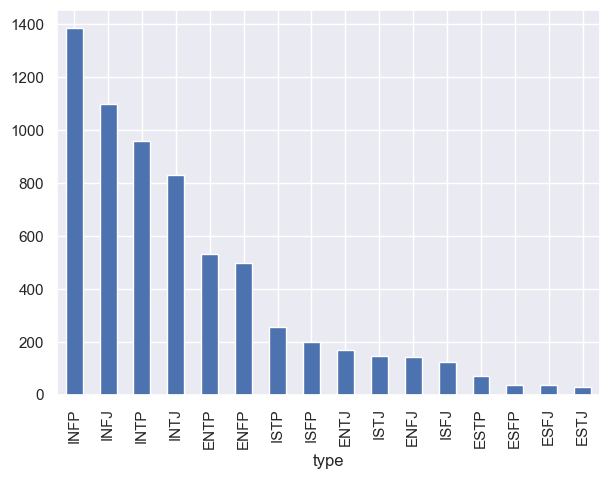

In [63]:
#visualize the distribution of the personality type
plt.figure(figsize=(7,5))
data['type'].value_counts().plot(kind='bar')
plt.show()

In [64]:
# Separate each post in the 'posts' column into its own row
data.head()


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [65]:
# Let us Separate each post in the 'posts' column into its own row
data_list = []
for i, row in data.iterrows():
    for post in row['posts'].split('|||'):
        data_list.append([row['type'], post])
dataset = pd.DataFrame(data=data_list, columns=['type', 'post'])

In [66]:
dataset.head()
dataset.shape

(316548, 2)

In [67]:
dataset.head()

,type,post
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...


<Axes: xlabel='type'>

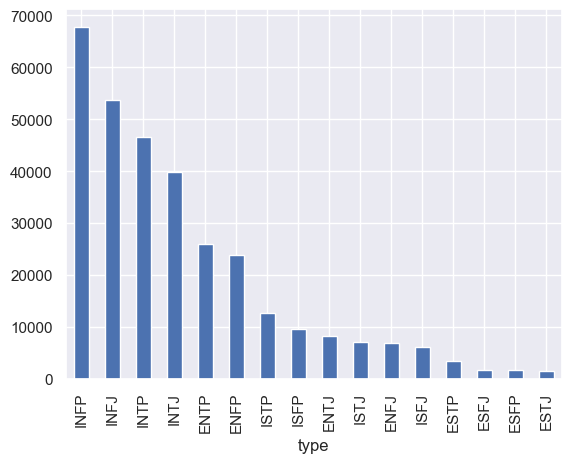

In [68]:
dataset['type'].value_counts().plot(kind='bar')

## We Move to Text Cleaning 

### Remove noise

In [69]:
# We will use regx patterns in this case

# Replace URLs in the 'post' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
dataset['post']  =  dataset['post'].replace(to_replace=pattern_url,
                                              value= subs_url,
                                              regex=True)
dataset.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


### Remove punctuation

In [70]:
dataset.head()

,type,post
0,INFJ,'url-web
1,INFJ,url-web
2,INFJ,enfp and intj moments url-web sportscenter n...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,url-web url-web On repeat for most of today.


In [72]:
import string
dataset['post'] = dataset['post'].str.lower()
def remove_punctuation(post):
    return ''.join([word for word in post if word not in string.punctuation])

dataset['post']  = dataset['post'].apply(remove_punctuation)
dataset['post'].iloc[268558]

'just when i think i’ve lost you just when i’m so tired i toss away the fight and say “i’ll just embrace my demons then… ‘cause you feel so far away and i’ll never be your angel” —that’s when'

In [ ]:
dataset.head()

### Tokenization

In [93]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Allan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [94]:
from nltk.tokenize import TreebankWordTokenizer, word_tokenize
tokenizer = TreebankWordTokenizer()
tknizer = word_tokenize
text = 'A tokenizer divides text into a sequence of tokens, which roughly correspond to "words".'
#Example application
tknizer(text = text)

['A',
 'tokenizer',
 'divides',
 'text',
 'into',
 'a',
 'sequence',
 'of',
 'tokens',
 ',',
 'which',
 'roughly',
 'correspond',
 'to',
 '``',
 'words',
 "''",
 '.']

In [75]:
dataset['tokens'] = dataset['post'].apply(tokenizer.tokenize)
dataset.head()

,type,post,tokens
0,INFJ,urlweb,[urlweb]
1,INFJ,urlweb,[urlweb]
2,INFJ,enfp and intj moments urlweb sportscenter no...,"[enfp, and, intj, moments, urlweb, sportscente..."
3,INFJ,what has been the most lifechanging experience...,"[what, has, been, the, most, lifechanging, exp..."
4,INFJ,urlweb urlweb on repeat for most of today,"[urlweb, urlweb, on, repeat, for, most, of, to..."


In [76]:
dataset.iloc[55555]

type                                                   INTJ
post      i find all of you to be extremely humorous now...
tokens    [i, find, all, of, you, to, be, extremely, hum...
Name: 55555, dtype: object

### Stemming

In [97]:
## Stemmig rounds the word to its nearest root word. 
# There are three algorithims used in sttemming, namely
    #* Porter
    #* Lancaster
    #* Snowbal

from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
#Example
words = 'caring cares cared caringly carefully'
stemmer = SnowballStemmer(language='english')
for word in words.split(' '):
    stemmed_word = stemmer.stem(word)
    print(stemmed_word)

care
care
care
care
care


In [100]:
#Applying to our dataset
def _stem_(words, stemmer):
    stemmer = SnowballStemmer(language='english')
    return [stemmer.stem(word) for word in words]

dataset['stem'] = dataset['tokens'].apply(_stem_, args= (stemmer, ))
dataset.head()

,type,post,tokens,stem
0,INFJ,urlweb,[urlweb],[urlweb]
1,INFJ,urlweb,[urlweb],[urlweb]
2,INFJ,enfp and intj moments urlweb sportscenter no...,"[enfp, and, intj, moments, urlweb, sportscente...","[enfp, and, intj, moment, urlweb, sportscent, ..."
3,INFJ,what has been the most lifechanging experience...,"[what, has, been, the, most, lifechanging, exp...","[what, has, been, the, most, lifechang, experi..."
4,INFJ,urlweb urlweb on repeat for most of today,"[urlweb, urlweb, on, repeat, for, most, of, to...","[urlweb, urlweb, on, repeat, for, most, of, to..."


In [101]:
for i, t in enumerate(dataset.iloc[268702]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, dataset.iloc[268702]['stem'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angri     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regular   
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admin     
are                  --> are       
screwing             --> screw     
everything           --> everyth   
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

### Lemmalization

In [102]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Allan\AppData\Roaming\nltk_data...


True

In [106]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="s"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

cat
cactus
goose
rock
python
good
best
run
run


In [108]:
def _lemmatize_(words, lemmatizer):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word)for word in words]
dataset['lemma'] = dataset['tokens'].apply(_lemmatize_, args= (lemmatizer, ))
dataset.head()

,type,post,tokens,stem,lemma
0,INFJ,urlweb,[urlweb],[urlweb],[urlweb]
1,INFJ,urlweb,[urlweb],[urlweb],[urlweb]
2,INFJ,enfp and intj moments urlweb sportscenter no...,"[enfp, and, intj, moments, urlweb, sportscente...","[enfp, and, intj, moment, urlweb, sportscent, ...","[enfp, and, intj, moment, urlweb, sportscenter..."
3,INFJ,what has been the most lifechanging experience...,"[what, has, been, the, most, lifechanging, exp...","[what, has, been, the, most, lifechang, experi...","[what, ha, been, the, most, lifechanging, expe..."
4,INFJ,urlweb urlweb on repeat for most of today,"[urlweb, urlweb, on, repeat, for, most, of, to...","[urlweb, urlweb, on, repeat, for, most, of, to...","[urlweb, urlweb, on, repeat, for, most, of, to..."


In [109]:
for i, t in enumerate(dataset.iloc[268702]['tokens']):
    print('{:20s} --> {:10s}'.format(t, dataset.iloc[268702]['lemma'][i]))

i                    --> i         
hate                 --> hate      
april                --> april     
fools                --> fool      
day                  --> day       
angry                --> angry     
theres               --> there     
a                    --> a         
site                 --> site      
im                   --> im        
regularly            --> regularly 
on                   --> on        
and                  --> and       
the                  --> the       
admins               --> admins    
are                  --> are       
screwing             --> screwing  
everything           --> everything
up                   --> up        
today                --> today     
for                  --> for       
a                    --> a         
laugh                --> laugh     
but                  --> but       
i                    --> i         
dont                 --> dont      
find                 --> find      
it                   --> it 

### We can also remove stopwords

In [111]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
def remove_stopwords(tokens):
    return [words for words in tokens if words not in stopords_list]

dataset['stem'] = dataset['stem'].apply(remove_stopwords)
dataset.head()

,type,post,tokens,stem,lemma
0,INFJ,urlweb,[urlweb],[urlweb],[urlweb]
1,INFJ,urlweb,[urlweb],[urlweb],[urlweb]
2,INFJ,enfp and intj moments urlweb sportscenter no...,"[enfp, and, intj, moments, urlweb, sportscente...","[enfp, intj, moment, urlweb, sportscent, top, ...","[enfp, and, intj, moment, urlweb, sportscenter..."
3,INFJ,what has been the most lifechanging experience...,"[what, has, been, the, most, lifechanging, exp...","[lifechang, experi, life]","[what, ha, been, the, most, lifechanging, expe..."
4,INFJ,urlweb urlweb on repeat for most of today,"[urlweb, urlweb, on, repeat, for, most, of, to...","[urlweb, urlweb, repeat, today]","[urlweb, urlweb, on, repeat, for, most, of, to..."


In [115]:
'And' in dataset['tokens']

False